TODO
- are name lengths not misleading in many cases - or it is a feature actually - try throwing out pieces in parens.
- try less features! And check on other test set
- feature: correlate ticket numbers
- cabins: decks, numer of cabin
- better plotting with Seaborn: like in published kernels - bars, not distribution plot

In [1]:
import os
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import xgboost
from xgboost import XGBClassifier

C:\Users\sg0892454\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

## Train data load

In [3]:
d = pd.read_csv('datasets' + os.sep + 'train.csv', na_values=-1)

In [4]:
d.shape

(891, 12)

In [5]:
d.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
del d['PassengerId']

In [7]:
d = pd.get_dummies(d, columns=['Sex', 'Embarked']);

## Data exploration

#### Fill missing values

In [8]:
d.columns[d.isnull().any()]

Index(['Age', 'Cabin'], dtype='object')

- age

In [9]:
d[d['Age'].isnull()].shape

(177, 14)

In [10]:
d[d['Age'].isnull()]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
5,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,0,1,0
17,1,2,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,NaN,0,1,0,0,1
19,1,3,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,NaN,1,0,1,0,0
26,0,3,"Emir, Mr. Farred Chehab",NaN,0,0,2631,7.2250,NaN,0,1,1,0,0
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,NaN,1,0,0,1,0
29,0,3,"Todoroff, Mr. Lalio",NaN,0,0,349216,7.8958,NaN,0,1,0,0,1
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,1,0,PC 17569,146.5208,B78,1,0,1,0,0
32,1,3,"Glynn, Miss. Mary Agatha",NaN,0,0,335677,7.7500,NaN,1,0,0,1,0
36,1,3,"Mamee, Mr. Hanna",NaN,0,0,2677,7.2292,NaN,0,1,1,0,0
42,0,3,"Kraeff, Mr. Theodor",NaN,0,0,349253,7.8958,NaN,0,1,1,0,0


How average age differs by pclass and sex?

In [11]:
d.groupby(['Pclass', 'Sex_female']).agg({'Age': 'mean'})

Age
Pclass Sex_female           
1      0           41.281386
       1           34.611765
2      0           30.740707
       1           28.722973
3      0           26.507589
       1           21.750000

Differs much by pclass and sex, use it

What is the relation between title (Mr. Mrs. Miss, etc) and age?

In [12]:
d['isMr'] = d['Name'].str.contains('Mr\.')
d['isMrs'] = d['Name'].str.contains('Mrs\.') # married woman
d['isMaster'] = d['Name'].str.contains('Master\.')
d['isMiss'] = d['Name'].str.contains('Miss\.') | d['Name'].str.contains('Mlle\.')
d['isMs'] = d['Name'].str.contains('Ms\.') # unmarried woman

d['isRev'] = d['Name'].str.contains('Rev\.') # clergy
d['isDr'] = d['Name'].str.contains('Dr\.') # rather as academic grade
d['isNoble'] = d['Name'].str.contains('Lady\.') | d['Name'].str.contains('Mme\.') | d['Name'].str.contains('Sir\.') | d['Name'].str.contains('Countess\.') | d['Name'].str.contains('Don\.') | d['Name'].str.contains('Dona\.') | d['Name'].str.contains('Jonkheer\.')
d['isMilitary'] = d['Name'].str.contains('Major\.') | d['Name'].str.contains('Col\.') | d['Name'].str.contains('Capt\.')

assert d[~d['isMr'] & ~d['isMrs'] & ~d['isMaster'] & ~d['isMiss'] & ~d['isMs'] & ~d['isRev'] & ~d['isDr'] & ~d['isNoble'] & ~d['isMilitary']].empty

In [13]:
honoric_features = ['isMr', 'isMrs', 'isMaster', 'isMiss', 'isMs', 'isRev', 'isDr', 'isNoble', 'isMilitary']

In [14]:
d[honoric_features +['Survived']].corr()['Survived']

isMr         -0.549199
isMrs         0.339040
isMaster      0.085221
isMiss        0.332795
isMs          0.042470
isRev        -0.064988
isDr          0.008185
isNoble       0.047886
isMilitary    0.002496
Survived      1.000000
Name: Survived, dtype: float64

It was checked, by CV that adding honoric features do not help CV.

In [15]:
for f in honoric_features:
    print(f, d[d[f]==True]['Age'].mean(), d[d[f]==True].shape[0])

isMr 32.368090452261306 517
isMrs 35.898148148148145 125
isMaster 4.574166666666667 40
isMiss 21.804054054054053 184
isMs 28.0 1
isRev 43.166666666666664 6
isDr 42.0 7
isNoble 38.666666666666664 6
isMilitary 56.6 5


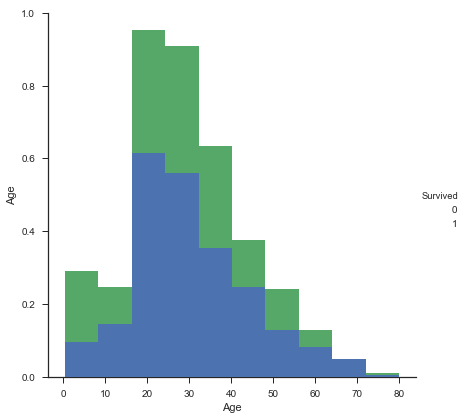

In [16]:
sns.set(style="ticks")
sns.pairplot(d[d['Age'].notnull()], size=6, hue='Survived', vars=['Age'])
plt.show()

In [17]:
for pclass in [1,2,3]:
    for title in ['isMr', 'isMrs', 'isMaster', 'isMiss']:
        d.loc[(d[title]==True) & (d['Pclass']==pclass) & (d['Age'].isnull()), ['Age']] = d[(d[title]==True) & (d['Pclass']==pclass)]['Age'].mean()
# default
d['Age'].fillna(d['Age'].mean(), inplace=True)

In [18]:
d[['Age', 'Survived']].corr()

,Age,Survived
Age,1.000000,-0.075713
Survived,-0.075713,1.000000


- Cabin

In [19]:
d['Cabin'].head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [20]:
d['Cabin_filled'] = d['Cabin'].notnull()

In [21]:
d[['Cabin_filled', 'Survived']].corr()

,Cabin_filled,Survived
Cabin_filled,1.000000,0.316912
Survived,0.316912,1.000000


Target variable distribution

In [22]:
d['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
d.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'isMr', 'isMrs', 'isMaster', 'isMiss', 'isMs', 'isRev', 'isDr', 'isNoble', 'isMilitary', 'Cabin_filled'], dtype='object')

### Correlations

In [24]:
features = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_filled']

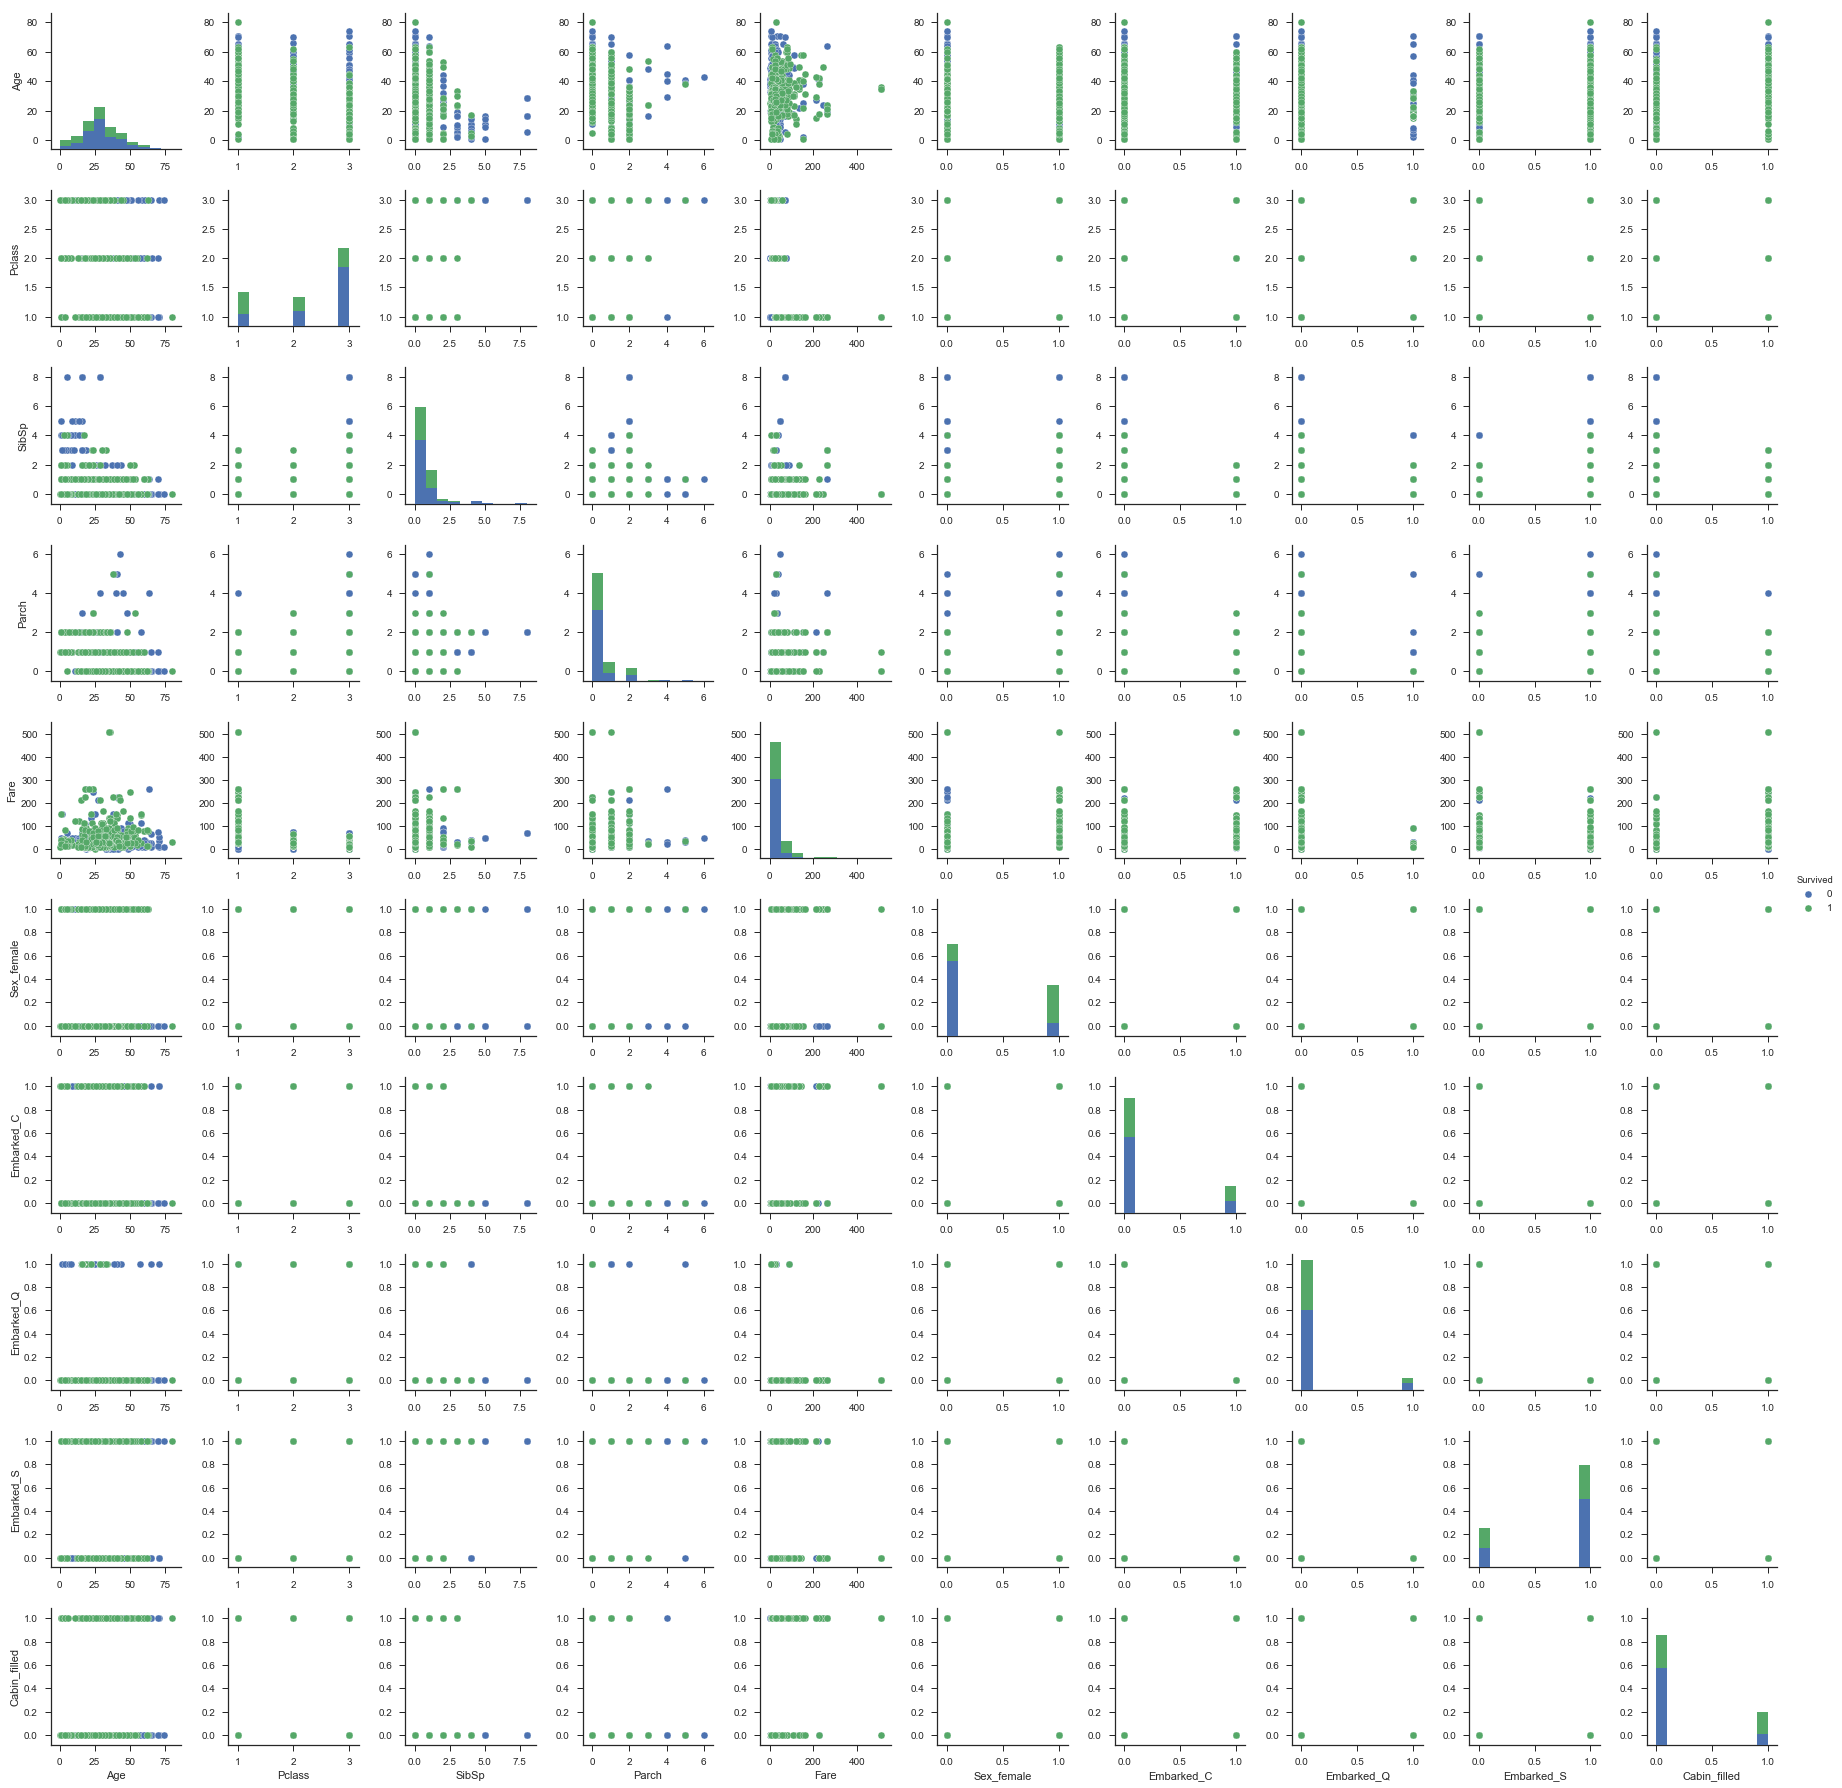

In [25]:
sns.set(style="ticks")
sns.pairplot(d, hue='Survived', vars=features)
plt.show()

Correlation strength

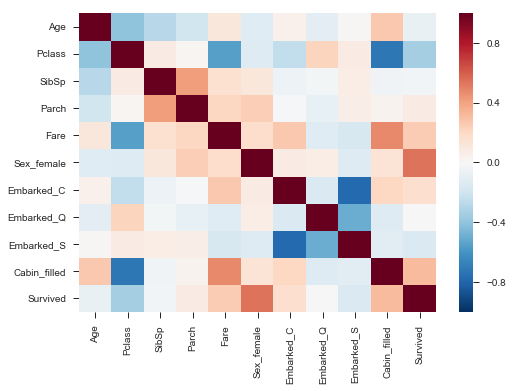

,Age,Pclass,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Cabin_filled,Survived
Age,1.000000,-0.402232,-0.275422,-0.192139,0.114387,-0.123821,0.049105,-0.103110,0.014181,0.268162,-0.075713
Pclass,-0.402232,1.000000,0.083081,0.018443,-0.549500,-0.131900,-0.243292,0.221009,0.081720,-0.725541,-0.338481
SibSp,-0.275422,0.083081,1.000000,0.414838,0.159651,0.114631,-0.059528,-0.026354,0.070941,-0.040460,-0.035322
Parch,-0.192139,0.018443,0.414838,1.000000,0.216225,0.245489,-0.011069,-0.081228,0.063036,0.036987,0.081629
Fare,0.114387,-0.549500,0.159651,0.216225,1.000000,0.182333,0.269335,-0.117216,-0.166603,0.482075,0.257307
Sex_female,-0.123821,-0.131900,0.114631,0.245489,0.182333,1.000000,0.082853,0.074115,-0.125722,0.140391,0.543351
Embarked_C,0.049105,-0.243292,-0.059528,-0.011069,0.269335,0.082853,1.000000,-0.148258,-0.778359,0.208528,0.168240
Embarked_Q,-0.103110,0.221009,-0.026354,-0.081228,-0.117216,0.074115,-0.148258,1.000000,-0.496624,-0.129572,0.003650
Embarked_S,0.014181,0.081720,0.070941,0.063036,-0.166603,-0.125722,-0.778359,-0.496624,1.000000,-0.110087,-0.155660
Cabin_filled,0.268162,-0.725541,-0.040460,0.036987,0.482075,0.140391,0.208528,-0.129572,-0.110087,1.000000,0.316912


In [26]:
corr = d[features + ['Survived']].corr()
fig, ax = plt.subplots()
sns.heatmap(corr, ax=ax, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
corr

In [27]:
X = d[features]
y = d['Survived']

In [28]:
cross_validate(RandomForestClassifier(class_weight = 'balanced'), X, y, cv=StratifiedKFold(n_splits=4, shuffle=True), n_jobs=-1)

{'fit_time': array([ 0.0150001 ,  0.0150001 ,  0.01600003,  0.0150001 ]),
 'score_time': array([ 0.00200009,  0.00099993,  0.00099993,  0.00099993]),
 'test_score': array([ 0.83035714,  0.74439462,  0.8018018 ,  0.80630631]),
 'train_score': array([ 0.97901049,  0.98353293,  0.97309417,  0.97010463])}

### Classes separability

How separable are target classes, when looked at after reducing dimensionality (manifolds)?

In [29]:
# # commented, as takes time to execute:
# from sklearn import preprocessing
# from sklearn.manifold import TSNE

# green = y==1
# blue = y==0

# X_scaled = preprocessing.scale(X)

# manifold = TSNE().fit_transform(X_scaled)

# plt.figure(figsize=(12,10))
# plt.scatter(manifold[green,0], manifold[green,1], c='g')
# plt.scatter(manifold[blue,0], manifold[blue,1], c='b')
# plt.show()

tSNE representation:

!['tSNE '](img/tSNE.png)

## Feature engineering

Will we get better correlation from dummies from 'Pclass', instead of when treating it as oridinal variable? 

In [30]:
d['Pclass_1'] = d['Pclass']==1
d['Pclass_2'] = d['Pclass']==2
d['Pclass_3'] = d['Pclass']==3

In [31]:
d[['Pclass', 'Pclass_1', 'Pclass_2', 'Pclass_3'] + ['Survived']].corr()

,Pclass,Pclass_1,Pclass_2,Pclass_3,Survived
Pclass,1.000000,-0.885924,-0.188432,0.916673,-0.338481
Pclass_1,-0.885924,1.000000,-0.288585,-0.626738,0.285904
Pclass_2,-0.188432,-0.288585,1.000000,-0.565210,0.093349
Pclass_3,0.916673,-0.626738,-0.565210,1.000000,-0.322308
Survived,-0.338481,0.285904,0.093349,-0.322308,1.000000


In [32]:
features_tested = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
cross_validate(RandomForestClassifier(class_weight = 'balanced'), d[features_tested], y, cv=StratifiedKFold(n_splits=4, shuffle=True), n_jobs=-1)

{'fit_time': array([ 0.0150001 ,  0.01399994,  0.0150001 ,  0.01599979]),
 'score_time': array([ 0.00199986,  0.00200009,  0.00099993,  0.0010004 ]),
 'test_score': array([ 0.78571429,  0.77130045,  0.78828829,  0.78828829]),
 'train_score': array([ 0.91004498,  0.92964072,  0.92825112,  0.91180867])}

Not better, also as relation is linear.

- family size

In [33]:
d['familySize'] = d['SibSp'] + d['Parch'] + 1

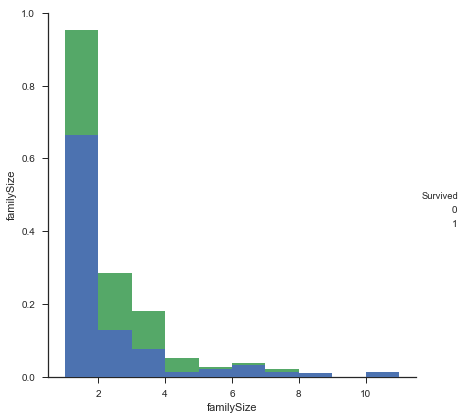

In [34]:
sns.set(style="ticks")
sns.pairplot(d, size=6, hue='Survived', vars=['familySize'])
plt.show()

We see that:
- the greatest change to survive is mid-size family
- both travelling alone and bigger families have less chance to survive.

Let's create 3 features for family size - third dummy is actually not needed.

In [35]:
d['family_isAlone'] = d['familySize'] == 1 
d['family_big'] = d['familySize'] > 4 

- babies?

In [36]:
# d['isBaby']=d['Age']<1
# CV scores not better, also already included in Age feature

- log transform skewed distributions

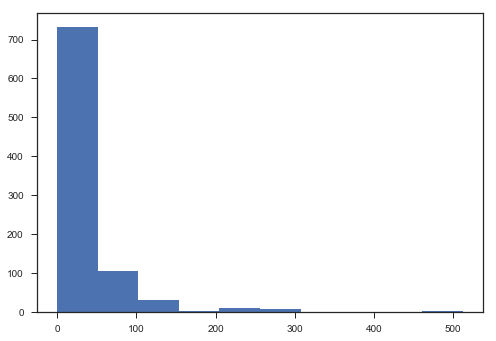

In [37]:
plt.hist(d['Fare'])
plt.show()

In [38]:
d['Fare_log'] = np.log2(d['Fare'] + 1)

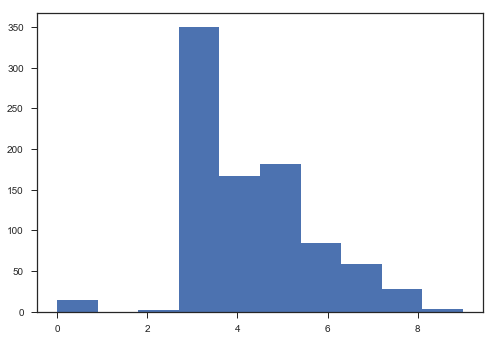

In [39]:
plt.hist(d['Fare_log'])
plt.show()

Checked by CV score and accuracy with Fare log transformed is better by good 1% for RF. But not for logistic!

In [40]:
# d[(d['Age']<16) & (d['Parch']==0)& (d['Survived']==1)].shape[0] / d[(d['Age']<16) & (d['Parch']==0)].shape[0]
# d['isSingleChild'] = d.apply(lambda r: r['Age']<16 and r['Parch']==0, axis=1)
# did not help in CV

- lenght of name

In [41]:
d['isMr_NameLength'] = d.apply(lambda r: len(r['Name'].split(' '))-1 if r['isMr']==True else 0, axis=1)
d['isMrs_NameLength'] = d.apply(lambda r: len(r['Name'].split(' '))-1 if r['isMrs']==True else 0, axis=1)
d['isMaster_NameLength'] = d.apply(lambda r: len(r['Name'].split(' '))-1 if r['isMaster']==True else 0, axis=1)
d['isMiss_NameLength'] = d.apply(lambda r: len(r['Name'].split(' '))-1 if r['isMiss']==True else 0, axis=1)

__They help Logit by 1% point stable.__

In [42]:
# d[(d['isMiss']) & (d['Pclass']==3)][['isMiss_NameLength', 'Survived']].corr()

In [43]:
d['isMr_LongName_Pclass_1'] = d.apply(lambda r: len(r['Name'].split(' '))-1 >=4 if r['isMr']==True and r['Pclass']==1 else False, axis=1)
d['isMaster_LongName_Pclass_3'] = d.apply(lambda r: len(r['Name'].split(' '))-1 >=4 if r['isMaster']==True and r['Pclass']==3 else False, axis=1)

- decks

In [44]:
# d['Cabin_first_letter'] = d[d['Cabin'].notnull()]['Cabin'].str[:1]
# d = pd.get_dummies(d, columns=['Cabin_first_letter']);

In [45]:
# cabin_code_features = ['Cabin_first_letter_' + l for l  in ['A', 'B', 'C', 'D', 'E', 'F']]
# d[cabin_code_features + ['Survived']].corr()

In [46]:
# d[d['Pclass']==3][['Cabin_first_letter_F', 'Survived']].corr()

In [47]:
# d['Cabin_first_letter_B_class_1'] = (d['Pclass']==1) & (d['Cabin_first_letter_B']==1)
# d['Cabin_first_letter_D_class_1'] = (d['Pclass']==1) & (d['Cabin_first_letter_D']==1)
# d['Cabin_first_letter_D_class_2'] = (d['Pclass']==2) & (d['Cabin_first_letter_D']==1)
# d['Cabin_first_letter_E_class_1'] = (d['Pclass']==1) & (d['Cabin_first_letter_E']==1)
# d['Cabin_first_letter_E_class_2'] = (d['Pclass']==2) & (d['Cabin_first_letter_E']==1)
# d['Cabin_first_letter_E_class_3'] = (d['Pclass']==3) & (d['Cabin_first_letter_E']==1)
# d['Cabin_first_letter_F_class_2'] = (d['Pclass']==2) & (d['Cabin_first_letter_F']==1)

Cabin first letter did not help in CV or in public LB

- order by ticket and find nannies

In [48]:
# tickets_children_without_parents = d[(d['Age']<=16) & (d['Parch']==0)]['Ticket'].values
# tickets_children_without_parents

In [49]:
# d[d['Ticket'].isin(tickets_children_without_parents)]

No special survivors..

From confusion matrix:
- First class male, rather always with cabin filled and traveling alone
- Third class females, without cabin,

In [50]:
# d['firstClassMaleWithCabinTravellingAlone'] = d.apply(lambda d: d['Sex_female']==False and d['Pclass']==1 and d['Cabin_filled']==True and d['family_isAlone']==True, axis=1)
# d['thirdClassFemaleWithoutCabin'] = d.apply(lambda d: d['Sex_female']==True and d['Pclass']==3 and d['Cabin_filled']==False, axis=1)

No improvement on CV on public score

- avg fare par family member

In [51]:
# d['farePerPerson'] = d['Fare'] / d['familySize']

Correlation of fare per person to target is 22% while fare log is 33%

Final set of features

In [52]:
features = ['Age', 'Pclass', 'Fare_log', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Cabin_filled'
           ] + ['family_isAlone', 'family_big'
           ] + ['isMr_NameLength', 'isMrs_NameLength', 'isMaster_NameLength', 'isMiss_NameLength'
           ] + ['isMr_LongName_Pclass_1', 'isMaster_LongName_Pclass_3']
X = d[features]

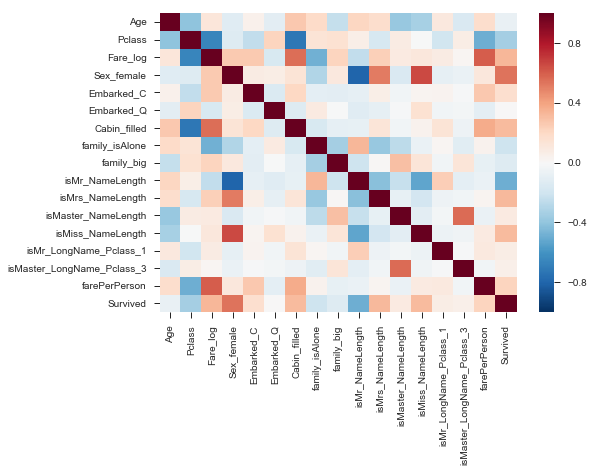

,Age,Pclass,Fare_log,Sex_female,Embarked_C,Embarked_Q,Cabin_filled,family_isAlone,family_big,isMr_NameLength,isMrs_NameLength,isMaster_NameLength,isMiss_NameLength,isMr_LongName_Pclass_1,isMaster_LongName_Pclass_3,farePerPerson,Survived
Age,1.000000,-0.402232,0.124821,-0.123821,0.049105,-0.103110,0.268162,0.188974,-0.234663,0.217901,0.178809,-0.380090,-0.329386,0.105755,-0.153647,0.174125,-0.075713
Pclass,-0.402232,1.000000,-0.661022,-0.131900,-0.243292,0.221009,-0.725541,0.135207,0.152366,0.069839,-0.167260,0.082146,-0.005244,-0.190566,0.073625,-0.485079,-0.338481
Fare_log,0.124821,-0.661022,1.000000,0.263276,0.262341,-0.160456,0.557192,-0.478410,0.221216,-0.246317,0.239790,0.091666,0.113810,0.083308,0.015827,0.606681,0.329862
Sex_female,-0.123821,-0.131900,0.263276,1.000000,0.082853,0.074115,0.140391,-0.303646,0.102954,-0.802641,0.522933,-0.154511,0.657735,-0.089764,-0.065645,0.115143,0.543351
Embarked_C,0.049105,-0.243292,0.262341,0.082853,1.000000,-0.148258,0.208528,-0.095298,-0.109274,-0.086945,0.062606,-0.039009,0.024337,0.037063,-0.010396,0.271215,0.168240
Embarked_Q,-0.103110,0.221009,-0.160456,0.074115,-0.148258,1.000000,-0.129572,0.086464,-0.005620,-0.122423,-0.091858,-0.008975,0.149771,-0.037425,-0.027369,-0.096038,0.003650
Cabin_filled,0.268162,-0.725541,0.557192,0.140391,0.208528,-0.129572,1.000000,-0.158029,-0.086035,-0.082357,0.131662,-0.031738,0.045646,0.134190,-0.048491,0.373966,0.316912
family_isAlone,0.188974,0.135207,-0.478410,-0.303646,-0.095298,0.086464,-0.158029,1.000000,-0.336825,0.331094,-0.380269,-0.257969,-0.063244,0.022284,-0.109599,0.045603,-0.203367
family_big,-0.234663,0.152366,0.221216,0.102954,-0.109274,-0.005620,-0.086035,-0.336825,1.000000,-0.203204,0.015298,0.303279,0.130715,-0.033277,0.125547,-0.081324,-0.125147
isMr_NameLength,0.217901,0.069839,-0.246317,-0.802641,-0.086945,-0.122423,-0.082357,0.331094,-0.203204,1.000000,-0.419728,-0.227890,-0.527925,0.242195,-0.096821,-0.065680,-0.487735


In [53]:
corr = d[features + ['Survived']].corr()
fig, ax = plt.subplots()
sns.heatmap(corr, ax=ax, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
corr

## Model selection

### Hyperparameters tuning 

In [54]:
grid_search_CV = GridSearchCV(RandomForestClassifier(n_estimators=100, class_weight='balanced'), {
    'criterion': ['gini', 'entropy'],
    'max_features': [3,4,5],
    'min_samples_split': [7, 10, 12, 20]
#     'max_depth': [3,4, 5]
}, n_jobs=7, cv=StratifiedKFold(n_splits=4, shuffle=True), verbose=10)

grid_search_CV.fit(X, y)
best_rf = grid_search_CV.best_estimator_
grid_search_CV.best_params_, grid_search_CV.best_score_
# 0.8372
# {'criterion': 'entropy', 'max_features': 3, 'min_samples_split': 20},

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    4.4s
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    4.7s
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    5.1s
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    5.4s
[Parallel(n_jobs=7)]: Done  47 tasks      | elapsed:    5.7s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    6.1s
[Parallel(n_jobs=7)]: Done  71 tasks      | elapsed:    6.5s
[Parallel(n_jobs=7)]: Done  93 out of  96 | elapsed:    7.3s remaining:    0.1s
[Parallel(n_jobs=7)]: Done  96 out of  96 | elapsed:    7.4s finished


({'criterion': 'gini', 'max_features': 3, 'min_samples_split': 20},
 0.83838383838383834)

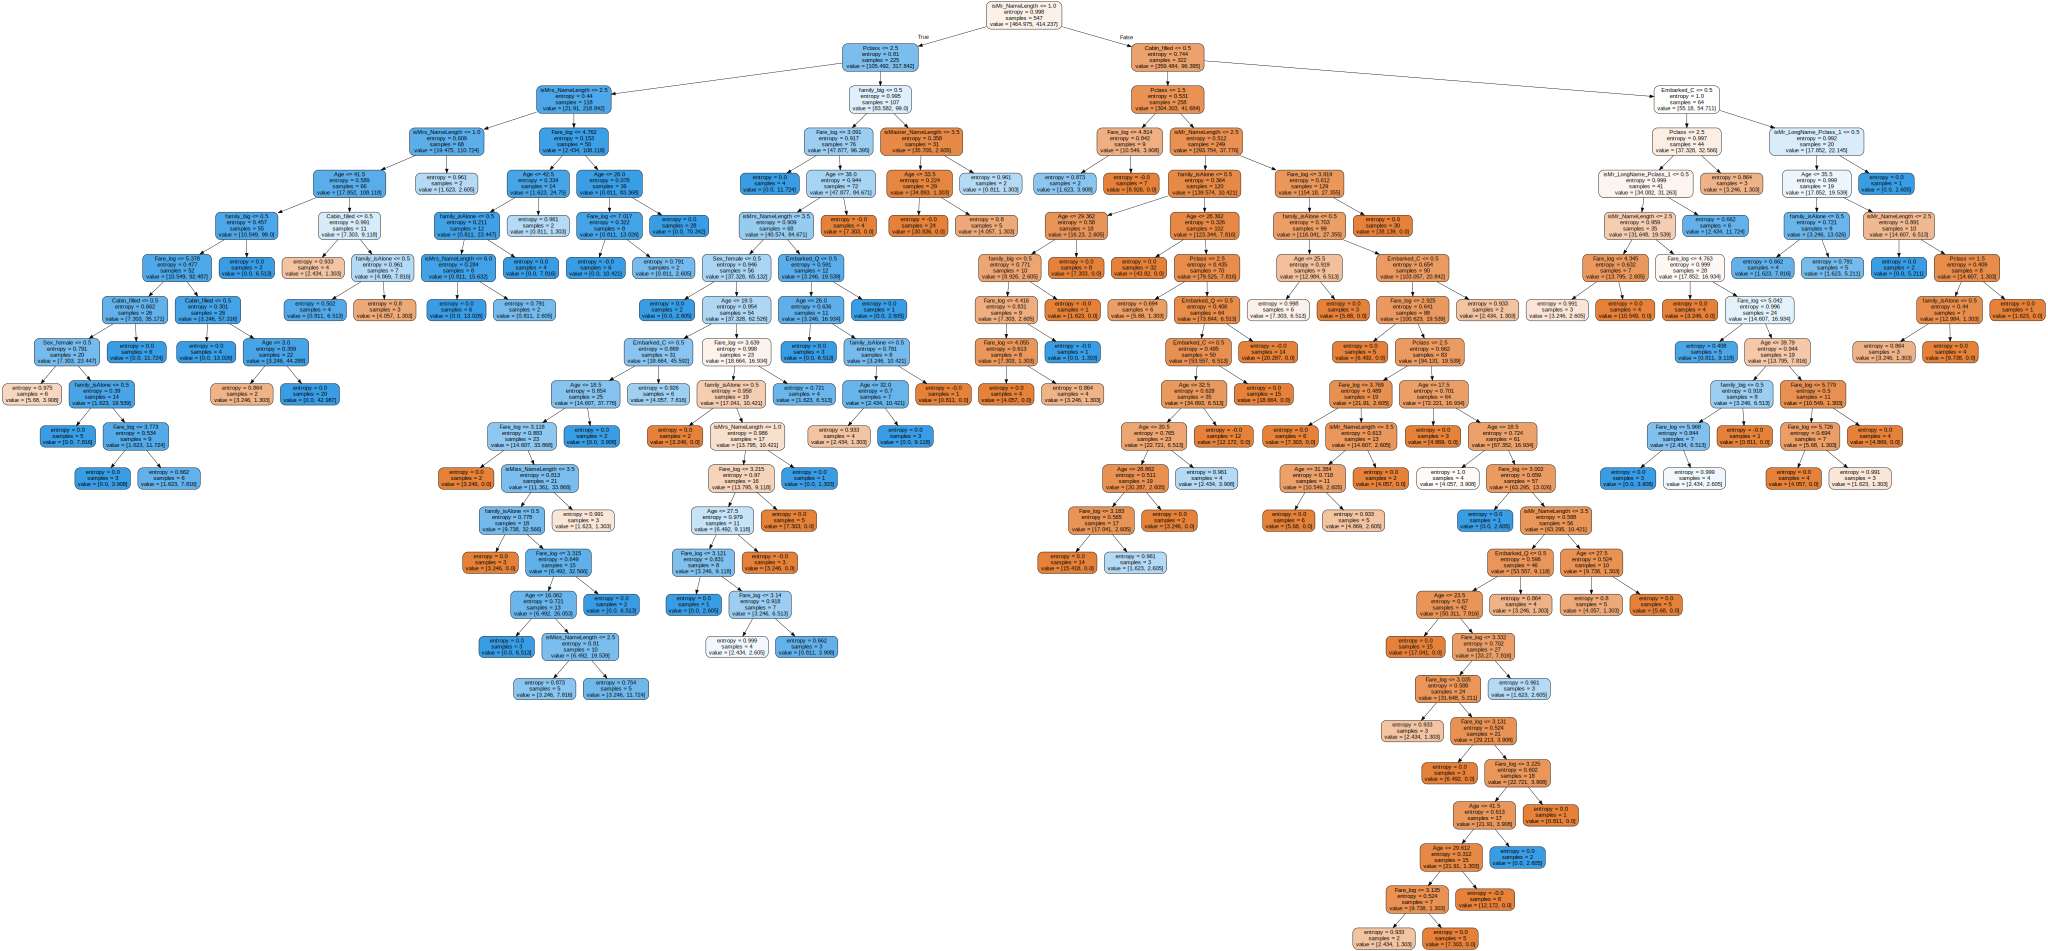

In [54]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(best_rf.estimators_[2], out_file=None, feature_names=features, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [55]:
grid_search_CV = GridSearchCV(XGBClassifier(n_estimators=400, max_depth=3, min_child_weight=2, gamma=0.1, reg_alpha=10, subsample=0.9, colsample_bytree=0.9, objective='binary:logistic'), {
    'max_depth': [4,5,6],
    'min_child_weight': [3, 4, 6],
    'gamma':[0.1, 1, 10],
    'reg_alpha':[1e-5, 1e-4, 1e-2, 0.1, 1]
}, n_jobs=7, cv=StratifiedKFold(n_splits=4, shuffle=True), verbose=10)

grid_search_CV.fit(X, y)
best_xgb = grid_search_CV.best_estimator_
grid_search_CV.best_params_, grid_search_CV.best_score_
# 0.840
# {'gamma': 1, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.1},

Fitting 4 folds for each of 135 candidates, totalling 540 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    3.4s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    5.6s
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    6.4s
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    7.3s
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    8.1s
[Parallel(n_jobs=7)]: Done  47 tasks      | elapsed:    9.2s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:   10.4s
[Parallel(n_jobs=7)]: Done  71 tasks      | elapsed:   12.0s
[Parallel(n_jobs=7)]: Done  84 tasks      | elapsed:   13.3s
[Parallel(n_jobs=7)]: Done  99 tasks      | elapsed:   14.9s
[Parallel(n_jobs=7)]: Done 114 tasks      | elapsed:   16.7s
[Parallel(n_jobs=7)]: Done 131 tasks      | elapsed:   18.9s
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed:   21.1s
[Parallel(n_jobs=7)]: Done 167 tasks      | elapsed:   23.3s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   25.3s
[Parallel(n_jobs=7)]: Done 207 tasks      | elapsed:   27.3s
[Parallel(n_jobs=7)]: Do

({'gamma': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 1e-05},
 0.83613916947250277)

In [56]:
from sklearn.linear_model import LogisticRegression

grid_search_CV = GridSearchCV(LogisticRegression(), {
    'C': np.logspace(0.1, 10, num=5),
    'class_weight': [None, 'balanced']
}, n_jobs=7, cv=StratifiedKFold(n_splits=4, shuffle=True), verbose=10)

grid_search_CV.fit(d[['Age', 'Pclass', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q'] + ['family_isAlone', 'family_big'] +  ['isMr_NameLength', 'isMrs_NameLength', 'isMaster_NameLength', 'isMiss_NameLength'] + ['isMr_LongName_Pclass_1', 'isMaster_LongName_Pclass_3']], y)
best_logit = grid_search_CV.best_estimator_
grid_search_CV.best_params_, grid_search_CV.best_score_
# 0.8170
# {'C': 375.8374042884443, 'class_weight': 'balanced'}

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    4.4s
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    4.5s
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    4.5s
[Parallel(n_jobs=7)]: Done  32 out of  40 | elapsed:    4.5s remaining:    1.0s
[Parallel(n_jobs=7)]: Done  37 out of  40 | elapsed:    4.5s remaining:    0.3s
[Parallel(n_jobs=7)]: Done  40 out of  40 | elapsed:    4.5s finished


({'C': 375.8374042884443, 'class_weight': None}, 0.84062850729517391)

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

grid_search_CV = GridSearchCV(ExtraTreesClassifier(n_estimators=70), { ## TODO increase estimators??
    'max_depth': [4,5,6,8,10, 15, 20],
    'min_samples_split': [3, 4, 6, 8, 10],
}, n_jobs=7, cv=StratifiedKFold(n_splits=4, shuffle=True), verbose=10)

grid_search_CV.fit(X, y)
best_xtrees = grid_search_CV.best_estimator_
grid_search_CV.best_params_, grid_search_CV.best_score_
# 0.8428
# {'max_depth': 10, 'min_samples_split': 4}

Fitting 4 folds for each of 35 candidates, totalling 140 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:    4.4s
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    4.5s
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed:    4.7s
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    4.9s
[Parallel(n_jobs=7)]: Done  47 tasks      | elapsed:    5.2s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    5.3s
[Parallel(n_jobs=7)]: Done  71 tasks      | elapsed:    5.6s
[Parallel(n_jobs=7)]: Done  84 tasks      | elapsed:    5.9s
[Parallel(n_jobs=7)]: Done  99 tasks      | elapsed:    6.2s
[Parallel(n_jobs=7)]: Done 114 tasks      | elapsed:    6.6s
[Parallel(n_jobs=7)]: Done 140 out of 140 | elapsed:    7.1s finished


({'max_depth': 20, 'min_samples_split': 10}, 0.83726150392817056)

WARN: it takes time, like 10 minutes to run CV on one hyperparams set on that SVC

In [58]:
# from sklearn.svm import SVC

# grid_search_CV = GridSearchCV(SVC(kernel='linear', probability=True, degree=2), {
#     #'kernel': ['linear', 'poly'],
#     'kernel': ['poly'],
# #     'C': [1, 10, 100]
#      'C': [10]
# }, n_jobs=7, cv=StratifiedKFold(n_splits=4, shuffle=True), verbose=10)

# grid_search_CV.fit(X, y)
# best_svc = grid_search_CV.best_estimator_
# grid_search_CV.best_params_, grid_search_CV.best_score_
# # ({'C': 10, 'kernel': 'poly'}, 0.8283)

In [59]:
from sklearn.svm import SVC
best_svc = SVC(kernel='poly', probability=True, degree=2, C=10)
best_svc.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Learning curves
Suspicion is we still have overfit problem

Check for just RF, to start:

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.05, 1.0, 6)):
    """
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

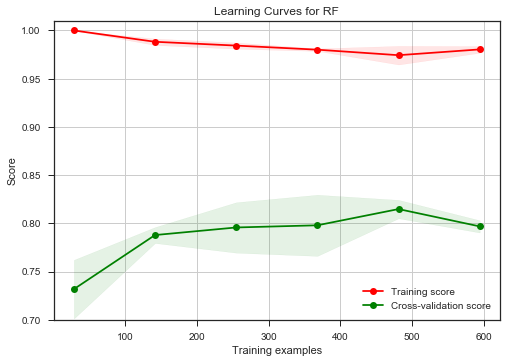

In [266]:
plot_learning_curve(RandomForestClassifier(n_jobs=-1), "Learning Curves for RF", X, y, ylim=(0.7, 1.01), n_jobs=4)

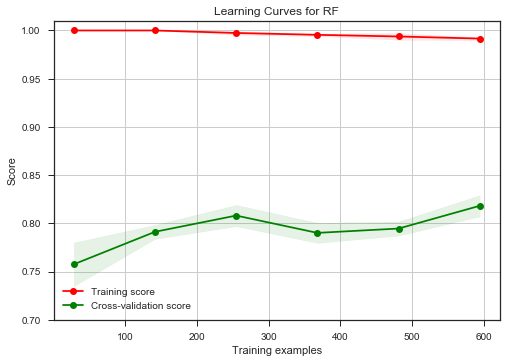

In [265]:
# even more overfit??
plot_learning_curve(RandomForestClassifier(n_jobs=-1, n_estimators=50), "Learning Curves for RF", X, y, ylim=(0.7, 1.01), n_jobs=4)

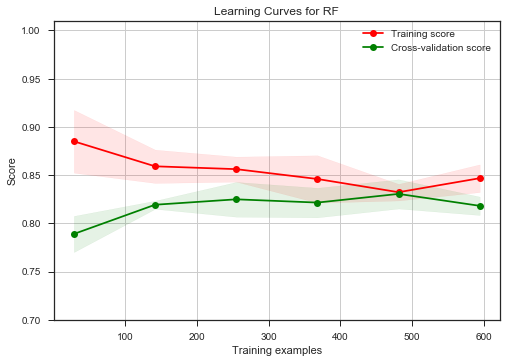

In [267]:
plot_learning_curve(RandomForestClassifier(n_jobs=-1, n_estimators=50, criterion='gini', max_features=3, min_samples_split=10, max_depth=4), "Learning Curves for RF", X, y, ylim=(0.7, 1.01), n_jobs=4)

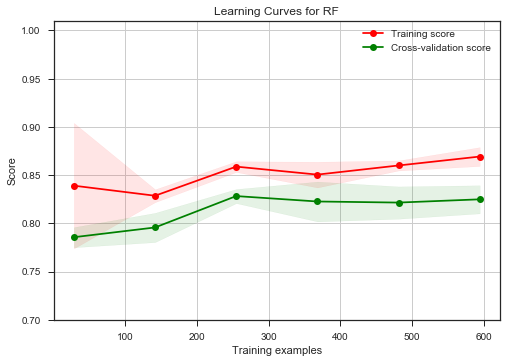

In [275]:
plot_learning_curve(best_rf, "Learning Curves for RF", X, y, ylim=(0.7, 1.01), n_jobs=4)

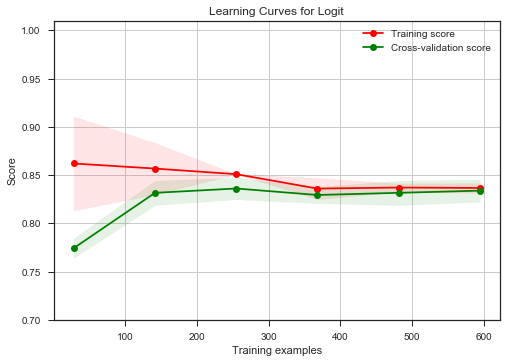

In [269]:
plot_learning_curve(best_logit, "Learning Curves for Logit", X, y, ylim=(0.7, 1.01), n_jobs=4)

In [153]:
# takes much time to fit SVC to all that sizes of test sets, and to CV it.
# plot_learning_curve(best_svc, "Learning Curves for SVC", X, y, ylim=(0.7, 1.01), n_jobs=4)

Learning curve for SVC:

!['tSNE '](img/learning_curve_SVC_poly_degree_2_C_10.png)

## Validation curves

In [57]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [62]:
best_rf

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=4,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

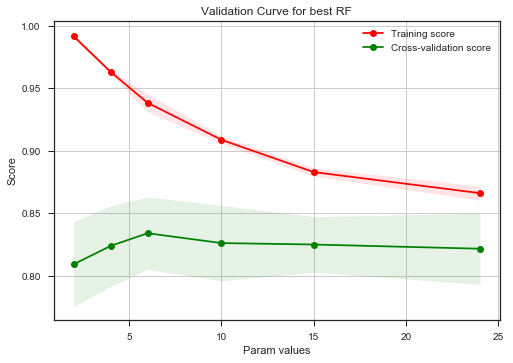

In [76]:
plot_validation_curve(best_rf, "Validation Curve for best RF", X, y, "min_samples_split", [int(v) for v in np.logspace(2, 6, base=1.7, num=6)], cv=StratifiedKFold(n_splits=4, shuffle=True), n_jobs=6)

## Ensembling

#### Voting

In [50]:
# from sklearn.ensemble import VotingClassifier
# ensemble = VotingClassifier(estimators=[('rf', best_rf), ('xgb', best_xgb), ('logit', best_logit), ('xtrees', best_xtrees), ('svc', best_svc)], voting='hard')
# grid_search_CV = GridSearchCV(ensemble, {
#     'weights': [None, [2,2,1, 2, 1.5], [3,4,1, 2, 1.5]],
#     'voting': ['hard']
# }, n_jobs=-1, cv=StratifiedKFold(n_splits=4, shuffle=True), verbose=10)

# grid_search_CV.fit(X, y)
# best_voting = grid_search_CV.best_estimator_
# grid_search_CV.best_params_, grid_search_CV.best_score_
# ({'voting': 'hard', 'weights': [2, 2, 1, 2, 1.5]}, 0.82828282828282829)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  4.6min remaining: 13.7min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  5.3min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  6.3min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  7.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  9.5min finished


({'voting': 'hard', 'weights': [2, 2, 1, 2, 1.5]}, 0.82828282828282829)

#### Stacking

In [60]:
from mlxtend.classifier import StackingCVClassifier
sclf = StackingCVClassifier(classifiers=[best_rf, best_xgb, best_logit, best_xtrees, best_svc], meta_classifier=LogisticRegression(), use_probas=True, cv=3, verbose=2)

In [61]:
cross_validate(sclf, X.values, y.values, cv=StratifiedKFold(n_splits=4, shuffle=True), n_jobs=-1)
# 'test_score': array([ 0.83035714,  0.83856502,  0.84234234,  0.82882883]),
# 'test_score': array([ 0.82589286,  0.86098655,  0.85135135,  0.80630631]),

{'fit_time': array([ 187.79099989,  166.54399991,  322.08200002,  207.60500002]),
 'score_time': array([ 0.01600003,  0.0170002 ,  0.01600003,  0.01599979]),
 'test_score': array([ 0.80357143,  0.84753363,  0.83333333,  0.85585586]),
 'train_score': array([ 0.91154423,  0.88772455,  0.89237668,  0.90134529])}

In [62]:
sclf.fit(X.values, y.values)

Fitting 5 classifiers...
Fitting classifier1: randomforestclassifier (1/5)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Training and fitting fold 1 of 3...
Training and fitting fold 2 of 3...
Training and fitting fold 3 of 3...
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=3, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.9)
Training

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=7, min_weig...y',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)],
           cv=3,
           meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
           shuffle=True, stratify=True, use_features_in_secondary=False,
           use_probas=True, verbose=2)

In [159]:
# takes much time, like 30 minutes
# plot_learning_curve(sclf, "Learning Curves for ensemble of 2nd level - Stacker", X.values, y.values, ylim=(0.7, 1.01), n_jobs=4)

Learning curve for Ensemble - Stacker of all 5 best classifiers:

!['Learning curve'](img/learning_curve_ensemble_stacker_all_5_best_classifiers.png)

Testing out other combinations of base classifiers into for stackings:

In [ ]:
# from mlxtend.classifier import StackingCVClassifier
# sclf = StackingCVClassifier(classifiers=[best_rf, best_xgb, best_xtrees, best_svc], meta_classifier=LogisticRegression(), use_probas=True, cv=3, verbose=2)
# cross_validate(sclf, X.values, y.values, cv=StratifiedKFold(n_splits=4, shuffle=True), n_jobs=-1)

Check correlations of base classifiers predictions

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

rf=RandomForestClassifier(n_estimators=100, class_weight='balanced', criterion='entropy', max_features=3, min_samples_split=20)
xgb=XGBClassifier(n_estimators=400, max_depth=5, min_child_weight=6, gamma=1, reg_alpha=0.1, subsample=0.9, colsample_bytree=0.9, objective='binary:logistic')
logit=LogisticRegression(C=375, class_weight='balanced')
xtrees=ExtraTreesClassifier(n_estimators=70, max_depth=10, min_samples_split=4)
svc=SVC(kernel='poly', C=10, probability=True, degree=2)

classifiers = [(rf, 'rf'), (xgb, 'xgb'), (logit, 'logit'), (xtrees, 'xtrees'), (svc, 'svc')]
predictions=pd.DataFrame()
scores=pd.DataFrame()

def predict(c, classifier_name):
    c.fit(X_train, y_train)
    y_preds_proba = c.predict_proba(X_test)
    predictions[classifier_name] = y_preds_proba[:,1]
    y_preds = c.predict(X_test)
    scores[classifier_name] = accuracy_score(y_test, y_preds)
    
for cls, cls_name in classifiers:
    predict(cls, cls_name)

scores

,rf,xgb,logit,xtrees,svc


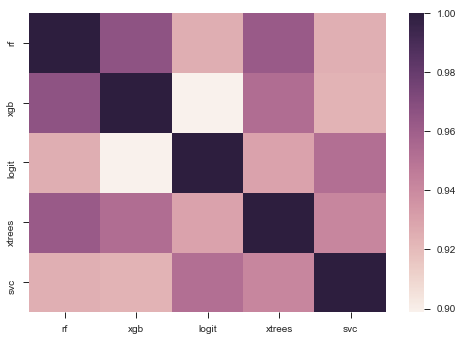

,rf,xgb,logit,xtrees,svc
rf,1.000000,0.966174,0.925469,0.962292,0.924952
xgb,0.966174,1.000000,0.898913,0.953271,0.923493
logit,0.925469,0.898913,1.000000,0.930096,0.952076
xtrees,0.962292,0.953271,0.930096,1.000000,0.941940
svc,0.924952,0.923493,0.952076,0.941940,1.000000


In [64]:
cls_corr = predictions.corr()
fig, ax = plt.subplots()
sns.heatmap(cls_corr, ax=ax, 
            xticklabels=[name for _,name in classifiers],
            yticklabels=[name for _,name in classifiers])
plt.show()
cls_corr

## Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix

X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X, y)

tmp_classifier = LogisticRegression(class_weight='balanced', C=300)
tmp_classifier.fit(X_train_tmp, y_train_tmp)
y_pred = tmp_classifier.predict(X_test_tmp)

confusion_matrix(y_test_tmp, y_pred)

array([[109,  19],
       [ 15,  80]], dtype=int64)

In [64]:
X_test_tmp['tmp_pred'] = y_pred
X_test_tmp['tmp_true'] = y_test_tmp

C:\Users\sg0892454\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sg0892454\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False negatives:

In [65]:
X_test_tmp[(X_test_tmp['tmp_pred']==0) & (X_test_tmp['tmp_true']==1)]

,Age,Pclass,Fare_log,Sex_female,Embarked_C,Embarked_Q,Cabin_filled,family_isAlone,family_big,isMr_NameLength,isMrs_NameLength,isMaster_NameLength,isMiss_NameLength,isMr_LongName_Pclass_1,isMaster_LongName_Pclass_3,thirdClassFemaleWithoutCabin,tmp_pred,tmp_true
400,39.000000,3,3.157852,0,0,0,False,True,False,2,0,0,0,False,False,False,0,1
692,28.724891,3,5.845385,0,0,0,False,True,False,2,0,0,0,False,False,False,0,1
483,63.000000,3,3.404290,1,0,0,False,True,False,0,2,0,0,False,False,True,0,1
543,32.000000,2,4.754888,0,0,0,False,False,False,2,0,0,0,False,False,False,0,1
107,28.724891,3,3.133399,0,0,0,False,True,False,3,0,0,0,False,False,False,0,1
127,24.000000,3,3.025330,0,0,0,False,True,False,3,0,0,0,False,False,False,0,1
643,28.724891,3,5.845385,0,0,0,False,True,False,2,0,0,0,False,False,False,0,1
267,25.000000,3,3.133399,0,0,0,False,False,False,3,0,0,0,False,False,False,0,1
587,60.000000,1,6.325530,0,1,0,True,False,False,2,0,0,0,False,False,False,0,1
233,5.000000,3,5.017365,1,0,0,False,False,True,0,0,0,3,False,False,True,0,1


People who actually survived, but the classifier could not see it, were __male__, from 1 and 3 class.

False positives

In [66]:
X_test_tmp[(X_test_tmp['tmp_pred']==1) & (X_test_tmp['tmp_true']==0)]

,Age,Pclass,Fare_log,Sex_female,Embarked_C,Embarked_Q,Cabin_filled,family_isAlone,family_big,isMr_NameLength,isMrs_NameLength,isMaster_NameLength,isMiss_NameLength,isMr_LongName_Pclass_1,isMaster_LongName_Pclass_3,thirdClassFemaleWithoutCabin,tmp_pred,tmp_true
251,29.0,3,3.518850,1,0,0,True,False,False,0,5,0,0,False,False,False,1,0
702,18.0,3,3.949927,1,1,0,False,False,False,0,0,0,2,False,False,True,1,0
100,28.0,3,3.153124,1,0,0,False,True,False,0,0,0,2,False,False,True,1,0
357,38.0,2,3.807355,1,0,0,False,True,False,0,0,0,3,False,False,False,1,0
246,25.0,3,3.133399,1,0,0,False,True,False,0,0,0,4,False,False,True,1,0
854,44.0,2,4.754888,1,0,0,False,False,False,0,5,0,0,False,False,False,1,0
767,30.5,3,3.129283,1,0,1,False,True,False,0,0,0,2,False,False,True,1,0
245,44.0,1,6.507795,0,0,1,True,False,False,0,0,0,0,False,False,False,1,0
102,21.0,1,6.290710,0,0,0,True,False,False,3,0,0,0,False,False,False,1,0
789,46.0,1,6.325530,0,1,0,True,True,False,2,0,0,0,False,False,False,1,0


People who __did not survive__, but the classifier asserted they did, were:

1. First class male, rather always with cabin filled and traveling alone
2. Third class females, without cabin, 

Why classifier is so good at predicting class 2?? And much much worse for the other 2 classes?

In [286]:
d[d['Pclass']==2][['Age', 'Sex_female', 'Fare', 'Survived']].corr()

,Age,Sex_female,Fare,Survived
Age,1.000000,-0.085363,-0.200594,-0.276208
Sex_female,-0.085363,1.000000,0.081997,0.753121
Fare,-0.200594,0.081997,1.000000,0.098628
Survived,-0.276208,0.753121,0.098628,1.000000


In [287]:
d[d['Pclass']==1][['Age', 'Sex_female', 'Fare', 'Survived']].corr()

,Age,Sex_female,Fare,Survived
Age,1.000000,-0.221078,-0.217420,-0.253958
Sex_female,-0.221078,1.000000,0.246625,0.615212
Fare,-0.217420,0.246625,1.000000,0.190966
Survived,-0.253958,0.615212,0.190966,1.000000


In [288]:
d[d['Pclass']==3][['Age', 'Sex_female', 'Fare', 'Survived']].corr()

,Age,Sex_female,Fare,Survived
Age,1.000000,-0.229907,-0.221080,-0.222346
Sex_female,-0.229907,1.000000,0.133768,0.387313
Fare,-0.221080,0.133768,1.000000,0.000930
Survived,-0.222346,0.387313,0.000930,1.000000


## Test data

In [85]:
d_test = pd.read_csv('datasets' + os.sep + 'test.csv')

In [86]:
submission = pd.DataFrame()
submission['PassengerId'] = d_test['PassengerId']
del d_test['PassengerId']

In [87]:
d_test.columns[d_test.isnull().any()]

Index(['Age', 'Fare', 'Cabin'], dtype='object')

In [88]:
for pclass in [1,2,3]:
    d_test.loc[(d_test['Pclass']==pclass) & (d_test['Fare'].isnull()), ['Fare']] = d_test[(d_test['Pclass']==pclass)]['Fare'].mean()
# default if not matched:
d_test['Fare'].fillna(d_test['Fare'].mean(), inplace=True)

In [89]:
d_test = pd.get_dummies(d_test, columns=['Sex', 'Embarked']);

In [90]:
d_test['isMr'] = d_test['Name'].str.contains('Mr\.')
d_test['isMrs'] = d_test['Name'].str.contains('Mrs\.') # married woman
d_test['isMaster'] = d_test['Name'].str.contains('Master\.')
d_test['isMiss'] = d_test['Name'].str.contains('Miss\.') | d_test['Name'].str.contains('Mlle\.')
d_test['isMs'] = d_test['Name'].str.contains('Ms\.') # unmarried woman

d_test['isRev'] = d_test['Name'].str.contains('Rev\.') # clergy
d_test['isDr'] = d_test['Name'].str.contains('Dr\.') # rather as academic grade
d_test['isNoble'] = d_test['Name'].str.contains('Lady\.') | d_test['Name'].str.contains('Mme\.') | d_test['Name'].str.contains('Sir\.') | d_test['Name'].str.contains('Countess\.') | d_test['Name'].str.contains('Don\.') |  d_test['Name'].str.contains('Dona\.') | d_test['Name'].str.contains('Jonkheer\.')
d_test['isMilitary'] = d_test['Name'].str.contains('Major\.') | d_test['Name'].str.contains('Col\.') | d_test['Name'].str.contains('Capt\.')


assert d_test[~d_test['isMr'] & ~d_test['isMrs'] & ~d_test['isMaster'] & ~d_test['isMiss'] & ~d_test['isMs'] & ~d_test['isRev'] & ~d_test['isDr'] & ~d_test['isNoble'] & ~d_test['isMilitary']].empty

In [91]:
d_test['familySize'] = d_test['SibSp'] + d_test['Parch'] + 1
d_test['family_isAlone'] = d_test['familySize'] == 1 
d_test['family_big'] = d_test['familySize'] > 4 

In [92]:
d_test['Fare_log'] = np.log2(d_test['Fare'] + 1)

In [93]:
for f in ['isMr', 'isMrs', 'isMaster', 'isMiss']:
    print(f, d_test[d_test[f]==True]['Age'].mean(), d_test[d_test[f]==True].shape[0])

isMr 32.0 240
isMrs 38.903225806451616 72
isMaster 7.406470588235294 21
isMiss 21.774843750000002 78


In [94]:
for pclass in [1,2,3]:
    for title in ['isMr', 'isMrs', 'isMaster', 'isMiss']:
        d_test.loc[(d_test[title]==True) & (d_test['Pclass']==pclass) & (d_test['Age'].isnull()), ['Age']] = d_test[(d_test[title]==True) & (d_test['Pclass']==pclass)]['Age'].mean()
# default
d_test['Age'].fillna(d_test['Age'].mean(), inplace=True)

In [95]:
d_test['Cabin_filled'] = d_test['Cabin'].notnull()

In [96]:
d_test['isMr_NameLength'] = d_test.apply(lambda r: len(r['Name'].split(' '))-1 if r['isMr']==True else 0, axis=1)
d_test['isMrs_NameLength'] = d_test.apply(lambda r: len(r['Name'].split(' '))-1 if r['isMrs']==True else 0, axis=1)
d_test['isMaster_NameLength'] = d_test.apply(lambda r: len(r['Name'].split(' '))-1 if r['isMaster']==True else 0, axis=1)
d_test['isMiss_NameLength'] = d_test.apply(lambda r: len(r['Name'].split(' '))-1 if r['isMiss']==True else 0, axis=1)
d_test['isMr_LongName_Pclass_1'] = d_test.apply(lambda r: len(r['Name'].split(' '))-1 >=4 if r['isMr']==True and r['Pclass']==1 else False, axis=1)
d_test['isMaster_LongName_Pclass_3'] = d_test.apply(lambda r: len(r['Name'].split(' '))-1 >=4 if r['isMaster']==True and r['Pclass']==3 else False, axis=1)

In [97]:
# d_test['Cabin_first_letter'] = d_test[d_test['Cabin'].notnull()]['Cabin'].str[:1]
# d_test = pd.get_dummies(d_test, columns=['Cabin_first_letter']);
# d_test['Cabin_first_letter_B_class_1'] = (d_test['Pclass']==1) & (d_test['Cabin_first_letter_B']==1)
# d_test['Cabin_first_letter_D_class_1'] = (d_test['Pclass']==1) & (d_test['Cabin_first_letter_D']==1)
# d_test['Cabin_first_letter_D_class_2'] = (d_test['Pclass']==2) & (d_test['Cabin_first_letter_D']==1)
# d_test['Cabin_first_letter_E_class_1'] = (d_test['Pclass']==1) & (d_test['Cabin_first_letter_E']==1)
# d_test['Cabin_first_letter_E_class_2'] = (d_test['Pclass']==2) & (d_test['Cabin_first_letter_E']==1)
# d_test['Cabin_first_letter_E_class_3'] = (d_test['Pclass']==3) & (d_test['Cabin_first_letter_E']==1)
# d_test['Cabin_first_letter_F_class_2'] = (d_test['Pclass']==2) & (d_test['Cabin_first_letter_F']==1)

# d_test['thirdClassFemaleWithoutCabin'] = d_test.apply(lambda d: d['Sex_female']==True and d['Pclass']==3 and d['Cabin_filled']==False, axis=1)

In [98]:
submission['Survived'] = sclf.predict(d_test[features].values)

In [99]:
date_time_stamp = datetime.now().strftime('%Y_%m_%d__%H_%M_%S')
submission.to_csv('submissions' + os.sep + 'submission_' + date_time_stamp + '.csv', float_format='%.4f', index=False)